# Unsupervised Clustering Approach

Auteur : Emilie Poisson Caillault

emilie.poisson@univ-littoral.fr

IDEA: 

- Detect patterns in point cloud or in time series

- Form optimal partition in $K$ cluster labeled $C_k$ from a dataset $X$

In [19]:
# Example dataset - Generation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import make_blobs,make_moons, make_circles
from sklearn.preprocessing import StandardScaler

# some bubbles
X1, lab1 = make_blobs(n_samples=12, centers=3, cluster_std=0.4, random_state=0)
X1 = StandardScaler().fit_transform(X1) 

# complex forms
Factor=2
moons, l1 = make_moons(n_samples=50*Factor, noise=0.05)
blobs, l2 = make_blobs(n_samples=50*Factor, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
circles, l3 = make_circles(n_samples=50*Factor, shuffle=True, noise=0.05, random_state=None, factor=0.1) 
X2 = np.vstack([moons, blobs,circles])
lab2=l1+l2+l3 # concat lists
X2 = StandardScaler().fit_transform(X2) 

X=X1
x, y = zip(*X1)
label=lab1
Nobs=len(label)

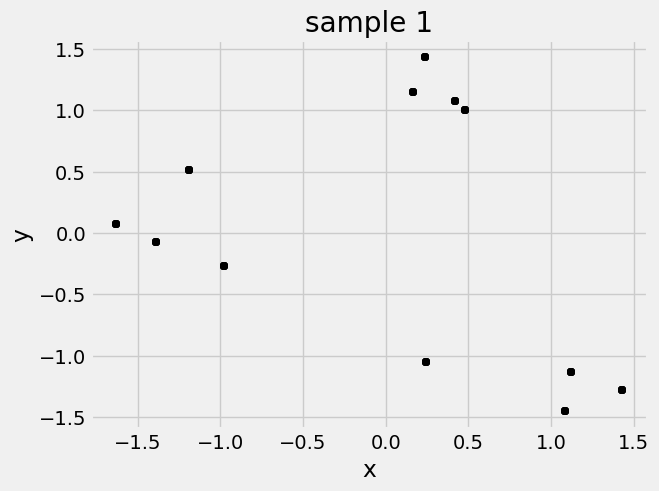

In [20]:
plt.scatter(x,y, marker='+',c="black")
plt.title("sample 1"); plt.xlabel("x"); plt.ylabel("y")
plt.show()


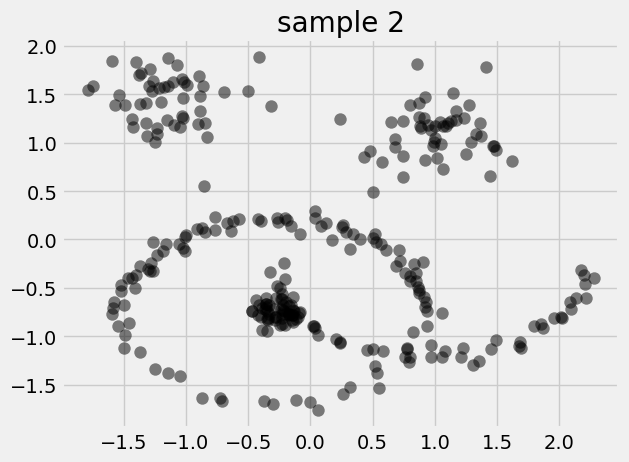

In [21]:
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(X2.T[0], X2.T[1], color='black', **plot_kwds)
plt.title("sample 2")
plt.show()

## 1-EM: Expectation Maximisation

**idea** : detect $K$ sub-populations from $K$  representatives of their populations. 

- KM : spherical shape

- EM : diagonal, ellipsoid, convex shape 

- PAM : medoids, representative point is an existing point in the database. 
    (Explicability, not artificial center without physical sense)
    
Without *a priori* knowledge about $K$, some methods to detect K:

- VAT, visual approach 

- minimization of within-cluster inertia curve (Elbow)

- maximization of silhouette

- maximization of consecutive gap between eigenvalues of a similarity matrix from $W$...
    

**Kmeans**

K-means algorithm consist in partitionning $Nobs$ observations $X_i \in X$ according to a SSE Within-cluster inertia 

$ SSE = \sum_i d^2(X,C_k(X))$ avec $C_k(X)=argmin_k d(X,C_k)$

- an iterative (Expectation-Maximization) process  

- Final Results depend on the initialization of the centers chosen at the beginning.

- Convergence but not necessarily to global optimum.

doc: [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html]



**Process**

1. init $K$ centroid $C_k$ (randomly or defined) and for each observation label($X_i$)=1

2. compute distances between each observation $X_i$ and each centroid $d(X_i,C_k)$ 
and assign label point: $label(X_i)={argmin}_k d(X_i,C_k)$

3. recompute centroid coordinates

4. stop criteria analysis: 

- no label assignation change

- the maximum number of iterations is reached, inertia criteria < threshold, ...

5. if unsatisfying criteria return in step 2.

In [22]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Estimation of K number 
# SSE vector for k range and average silhouette 
sse = []
sil=[]
Kmax=len(X)
for k in range(2, Kmax):
    kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    sil.append(silhouette_score(X,kmeans.labels_))


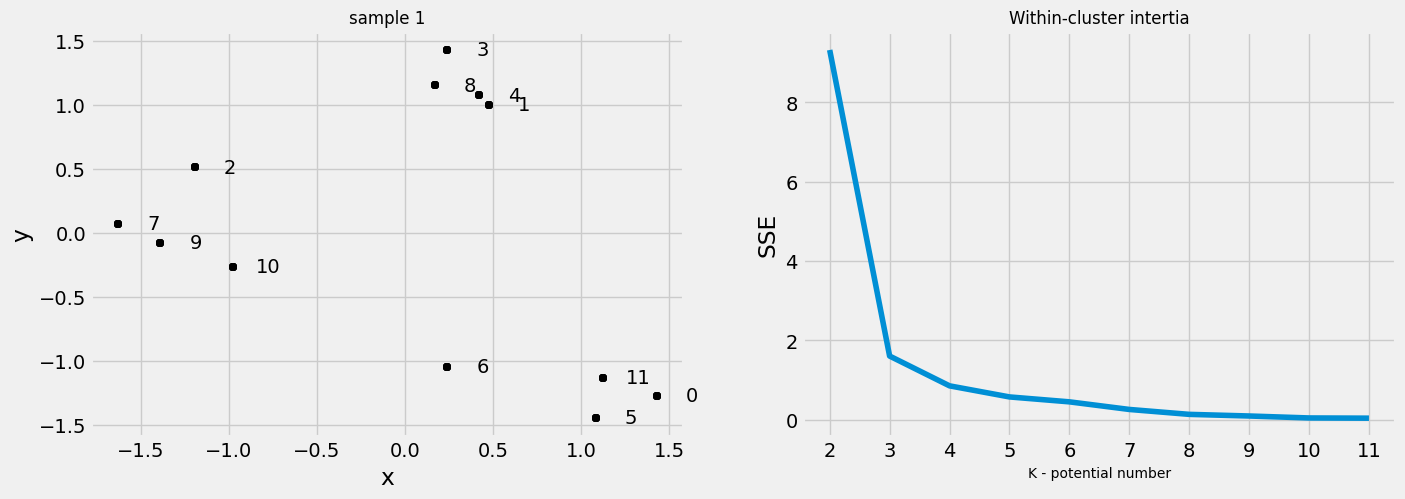

In [23]:
plt.figure(figsize= [15,5]); plt.subplot(121) ; plt.style.use("fivethirtyeight")
plt.scatter(X[:,0],X[:,1], marker='+',c="black")
plt.title("sample 1", fontdict={"fontsize": 12}); plt.xlabel("x"); plt.ylabel("y")
for i in range(len(x)):
    plt.text(X[i,0]+0.2,X[i,1],str(i), horizontalalignment = 'center', verticalalignment = 'center') 
plt.subplot(122) ; plt.style.use("fivethirtyeight")
plt.plot(range(2, Kmax), sse)
plt.xticks(range(2, Kmax))
plt.xlabel("K - potential number",fontdict={"fontsize": 10}); plt.ylabel("SSE")
plt.title("Within-cluster intertia", fontdict={"fontsize": 12})
plt.show()

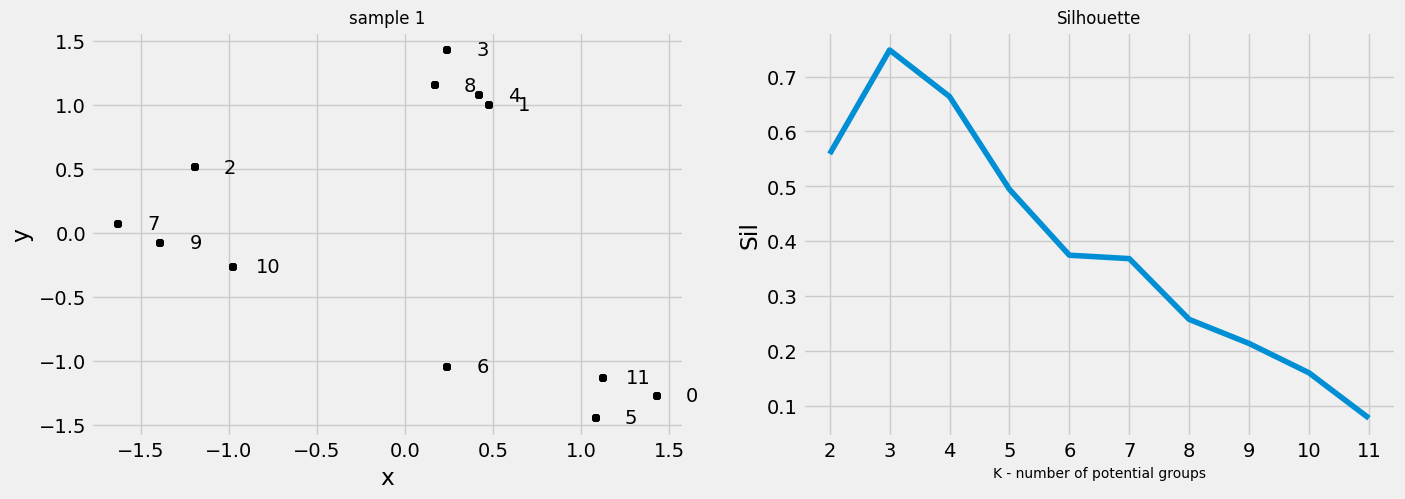

In [24]:
plt.figure(figsize= [15,5]) ; plt.subplot(121) ;plt.style.use("fivethirtyeight")
plt.scatter(x,y, marker='+',c="black")
plt.title("sample 1",fontdict={"fontsize": 12}); plt.xlabel("x"); plt.ylabel("y")
for i in range(len(x)):
    plt.text(x[i]+0.2,y[i],str(i), horizontalalignment = 'center', verticalalignment = 'center') 
plt.subplot(122); plt.style.use("fivethirtyeight")
plt.plot(range(2, Kmax), sil)
plt.xticks(range(2, Kmax))
plt.xlabel("K - number of potential groups", fontdict={"fontsize": 10});plt.ylabel("Sil")
plt.title("Silhouette", fontdict={"fontsize": 12})
plt.show()

In [25]:
# Elbow method to detect K
kl = KneeLocator(range(2, Kmax), sse, curve="convex", direction="decreasing")
K=kl.elbow
print("Estimated K by Elbow method on SSE=", K)
km1 = KMeans(init="random",n_clusters=K,n_init=10,max_iter=300,random_state=0)
km1.fit(X)
print(f"SSE inertia : {km1.inertia_}")
print(f"Centroid coordinates: \n{km1.cluster_centers_}")
print(f"Iteration number to converge: {km1.n_iter_}")
labels_km1=km1.labels_

Estimated K by Elbow method on SSE= 3
SSE inertia : 1.6067908190813438
Centroid coordinates: 
[[-1.29701363  0.06100764]
 [ 0.96992898 -1.22690017]
 [ 0.32708465  1.16589253]]
Iteration number to converge: 3


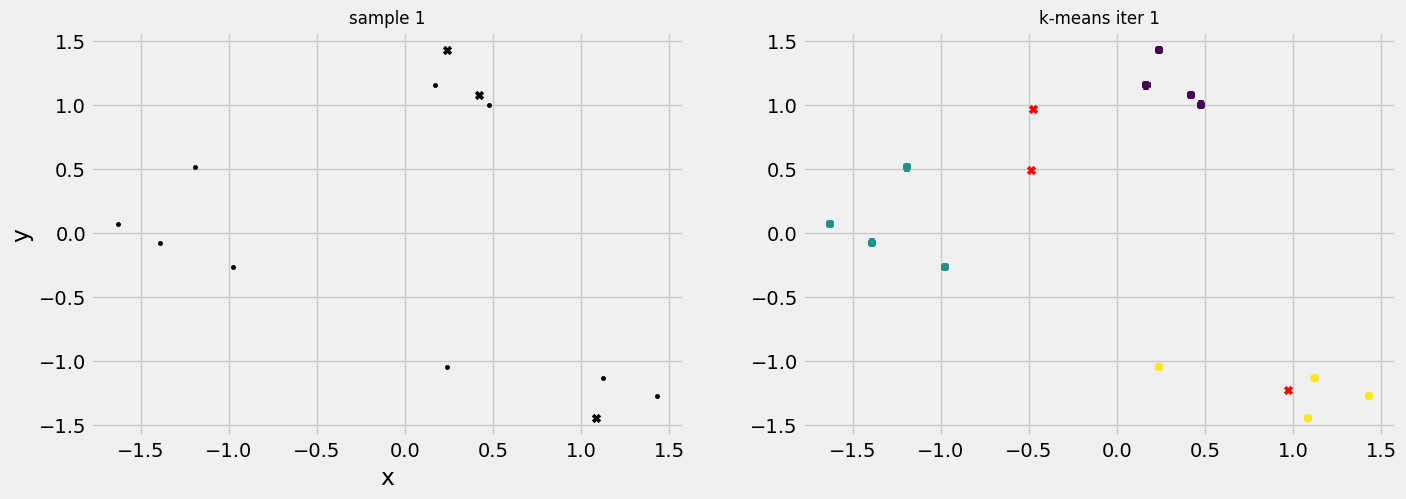

In [26]:
#First iteration
km1 = KMeans(init=X[3:6,:],n_clusters=3,n_init=1,max_iter=1); km1.fit(X)
#2nd iter and 3rd ite
km2 = KMeans(init=km1.cluster_centers_,n_clusters=3,n_init=1,max_iter=1)
km2.fit(X)
km3 = KMeans(init=km2.cluster_centers_,n_clusters=3,n_init=1,max_iter=1)
km3.fit(X)
plt.figure(figsize= [15,5]); plt.subplot(121)
plt.scatter(X[:,0],X[:,1], marker='.',c="black")
plt.scatter(X[3:6,0],X[3:6,1],marker='X',c='black') 
plt.title("sample 1", fontdict={"fontsize": 12}); plt.xlabel("x"); plt.ylabel("y")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=km1.labels_,marker='+')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='X',c='red') 
plt.title(f"k-means iter 1", fontdict={"fontsize": 12})
plt.show()

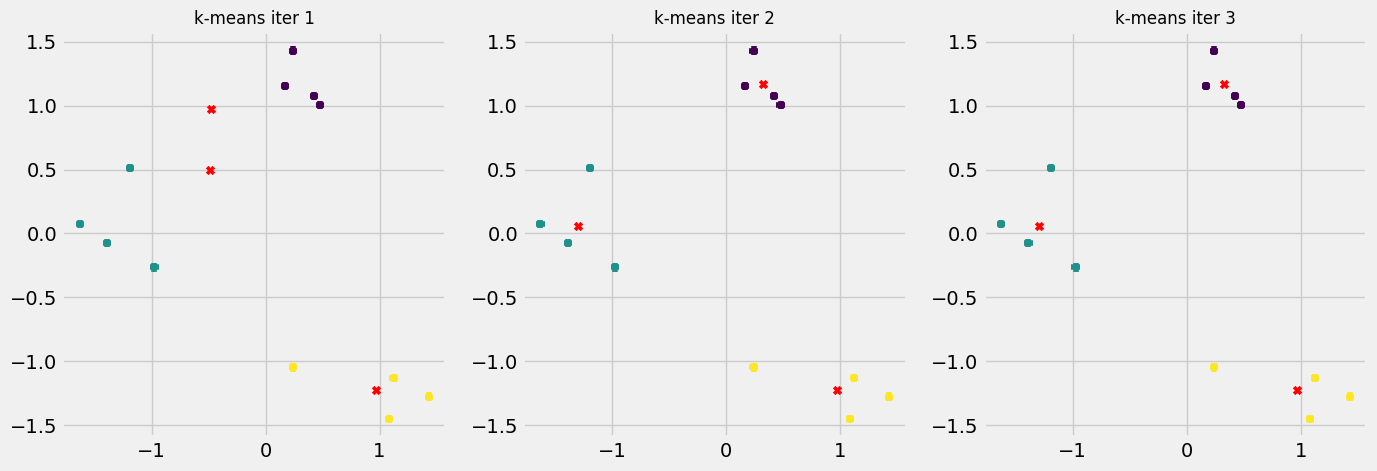

In [27]:
plt.figure(figsize= [15,5]); plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km1.labels_,marker='+')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='X',c='red') 
plt.title(f"k-means iter 1", fontdict={"fontsize": 12})
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_,marker='+')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],marker='X',c='red') 
plt.title(f"k-means iter 2", fontdict={"fontsize": 12})
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_,marker='+')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],marker='X',c='red') 
plt.title(f"k-means iter 3", fontdict={"fontsize": 12})
plt.show()


## 2- Hierarchical Clustering 

**idea** : Obtain a dendogram view of (dis)similarity relation between points.

- divisive - All points of the dataset forms one cluster at the beginning. Separate data as until each point (piece of data) is a singleton cluster. 

- agglomerative - Each point is initially a singleton cluster. Then associate close cluster until you merge all the data in one unique cluster.

Agglomerative Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Variants of association : X, data set, $X_i$ one observation/point et $S_a$ a set composed of elements from $X$   

- single-linkage clustering : associate closest points, minimize $$D(S_a,S_b)=\min _{{X_i\in S_a,X_j\in S_b}}d(X_i,X_j)$$

- complete-linkage clustering : associate closest clusters in the worst situation (pair of the farest points $X_i \in S_a$ and $X_j \in S_b$ ), minimize $$D(S_a,S_b)=\max _{{X_i\in S_a,X_j\in S_b}}d(X_i,X_j)$$ 

- average-linkage clustering : associate cluster with the highest proximity for each pair of points
 $${1 \over {|{\mathcal  {S_a}}|\cdot |{\mathcal  {S_b}}|}}\sum _{{X_i\in {\mathcal  {S_a}}}}\sum _{{y\in {\mathcal  {S_b}}}}d(X_i,X_j). $$

- Centroid linkage clustering : merge groups with closest centroids.

- Ward/Ward.d2 : minimize variance between groups to merge (or cut). 

- etc.


In [28]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo.fit(X)

print(agglo.linkage)
print(agglo.affinity)

print(agglo.n_connected_components_)
print(agglo.n_leaves_)


ward
euclidean
1
12


In [29]:
# How to produce a dendogram view

from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

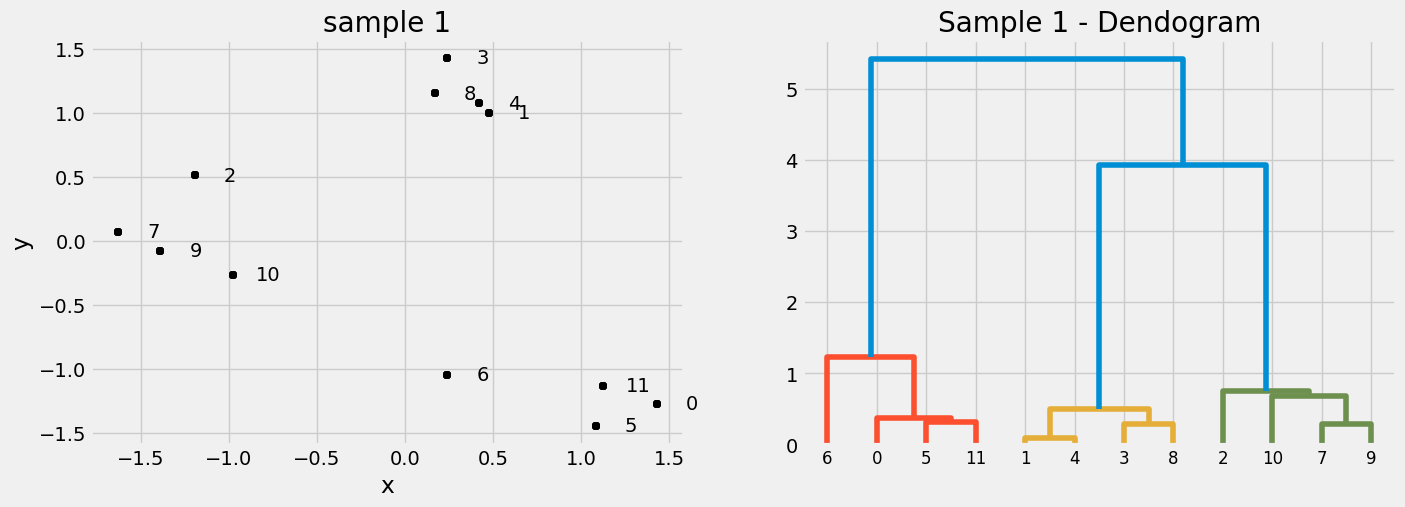

In [30]:
plt.figure(figsize= [15,5])
plt.subplot(121)
plt.scatter(X[:,0],X[:,1], marker='+',c="black")
plt.title("sample 1"); plt.xlabel("x"); plt.ylabel("y")
for i in range(len(x)):
    plt.text(X[i,0]+0.2,X[i,1],str(i), horizontalalignment = 'center', verticalalignment = 'center') 
plt.subplot(122)
plot_dendrogram(agglo)#,truncate_mode="level", p=3)
plt.title("Sample 1 - Dendogram")
plt.show()

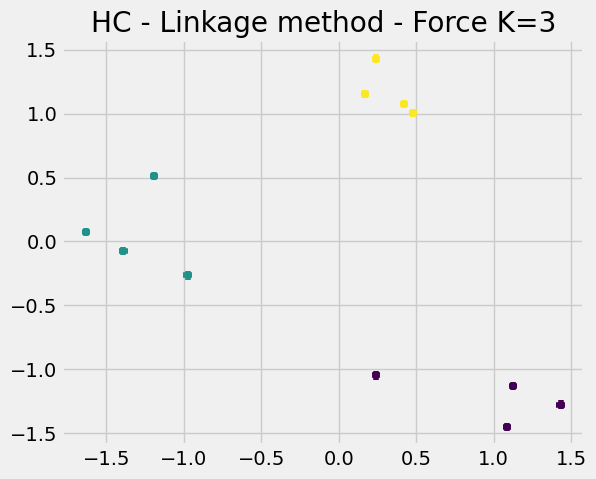

In [31]:
##### split according to a fixed K value

aggloK3 = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean', linkage = 'complete')
HClabels=aggloK3.fit_predict(X)
plt.figure(figsize= [6,5])
plt.scatter(X[:,0], X[:,1], marker='+', c=HClabels)
plt.title("HC - Linkage method - Force K=3"); plt.show()


## 3- Density Approach

**idea** : N connected points according to a $\epsilon$-distance belong to the same cluster. 

**Input to define** : $N$ minimum number of point to form a cluster, the $\epsilon$-distance of neighbourhood 

**Definitions**

- X is central point, named also core if $\epsilon$-neighbourhood is dense.

- X is a frontier point, named also border if it has less than N-1 neighbors.

- X is a noise point if it has no neighbor.


DBSCAN : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


In [32]:
from sklearn.cluster import DBSCAN

epsvois=0.5 #epsilon-distance
N=3 #minimum number of points to consider a cluster and core point

# DBSCAN : unsupervised Learning 
model1 = DBSCAN(eps=epsvois, min_samples=N)
model1.fit(X)
label=model1.labels_

# label>0 is a core point or border point
# label=-1 for noise
print("label=",label)

# identify noise points
ind_noise=[i for i in range(Nobs) if label[i] == -1]
print("noise number=",len(ind_noise))

# identify labeled points
ind_label=[i for i in range(Nobs) if label[i]>-1]
print("number of labeled points=",len(ind_label))

# identify core points
ind_central=model1.core_sample_indices_
print("core number=",len(ind_central))

#identify border points
ind_border=[ele for ele in ind_label if ele not in ind_central]
print("border=",len(ind_border))



label= [ 0  1 -1  1  1  0 -1  2  1  2  2  0]
noise number= 2
number of labeled points= 10
core number= 8
border= 2


**Method** :

1- Build non oriented graph of $X$

2-  Connect all segment $[X_iX_j]$ with a size $\ge \epsilon$.

3- Detect each core (connected by N-1 segments), color it. 

4- Stronger mark connections between neighbouring central points.

5- Detect border points to core.

6- Eject noise points 

7- Assign different positive label to each connected set. And Assign label point $X_i according its subset. And -1 for noise.


**Pro/cons**

- Does not force the assignment of a remote point to a cluster.

- $N$ parameter to tune.

- $\epsilon$ parameter to tune (or use HDBSCAN if you have not a large dataset).

- Real dataset :Could result in a considerable amount of noise assignment.
    

In [33]:
myPalette=['red','green','blue','yellow','cyan',"orange","pink","brown"]
mymarker=['.' for i in range(Nobs)]
mycolor=['black' for i in range(Nobs)]

for e in ind_central : 
    mymarker[e]='o'
for e in ind_label : 
    mycolor[e]=myPalette[label[e]]


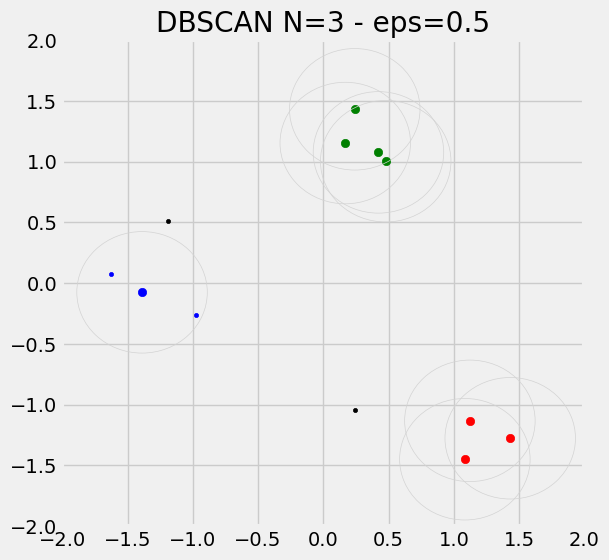

In [34]:
plt.figure(figsize=[6,6]);plt.title("DBSCAN N={} - eps={:.1f}".format(N,epsvois))
for _x, _y,_m,_c in zip(X[:,0], X[:,1],mymarker,mycolor):
    plt.scatter(_x, _y, marker=_m, c=_c)
for _xc, _yc in X[ind_central]:
   plt.gca().add_patch(plt.Circle( (_xc, _yc ),epsvois , fill = False , color="lightgray"))    
plt.xlim(-2, 2); plt.ylim(-2, 2);plt.show()


### Hierarchical Variant: HDBSCAN

**idea** Build a dendogram based on ponderated distances between cores and construire un dendogramme basé sur les distances pondérées des points centraux et ne récupérer que les clusters stables.

**method**

1- Compute mutual reachable distance between points (N neighbors, k-nearest-neighbors).

2- Build a reduced graph based on core points (Spanning tree).

3- Build a hierarchy based on connected composants (core, border)

4- Condense the hierarchy to reduce the size of cluster

5- Extract stable cluster (long life $\lambda$ in the hierarchy)


In [35]:
#maybe upgrade pip and then install sip and hdbscan (msvc C++ build tools) 
# python -m pip install --upgrade joblib==1.1.0
import hdbscan

N=3

hdb = hdbscan.HDBSCAN(min_cluster_size=N, gen_min_span_tree=True)
hdb.fit(X)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

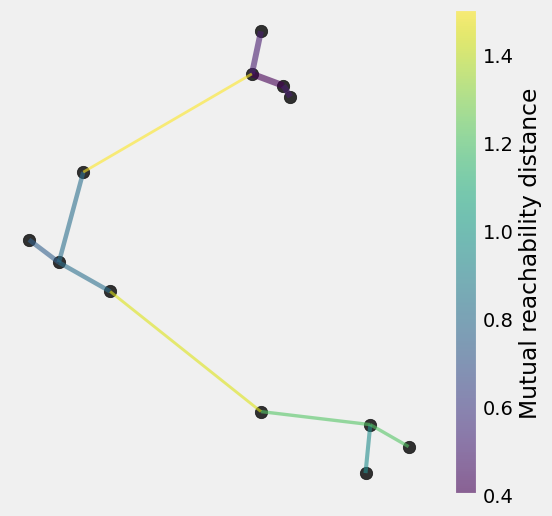

In [36]:
#spanning tree
plt.figure(figsize= [6,6])
hdb.minimum_spanning_tree_.plot(edge_cmap='viridis',edge_alpha=0.6,node_size=80, edge_linewidth=2)
plt.show()

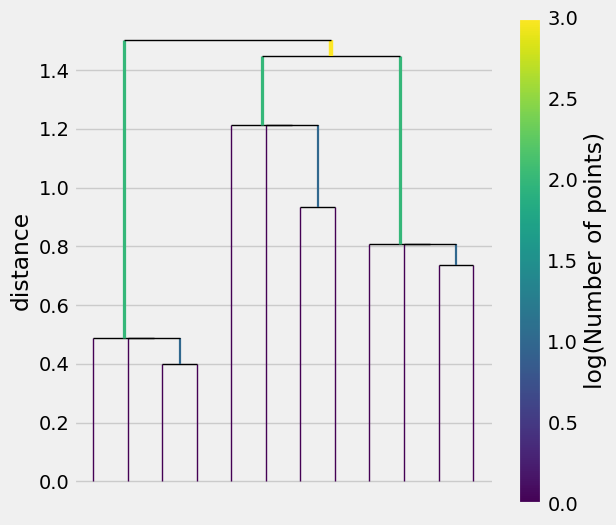

In [37]:
#dendogram, cluster hierarchy
plt.figure(figsize= [6,6])
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.show()

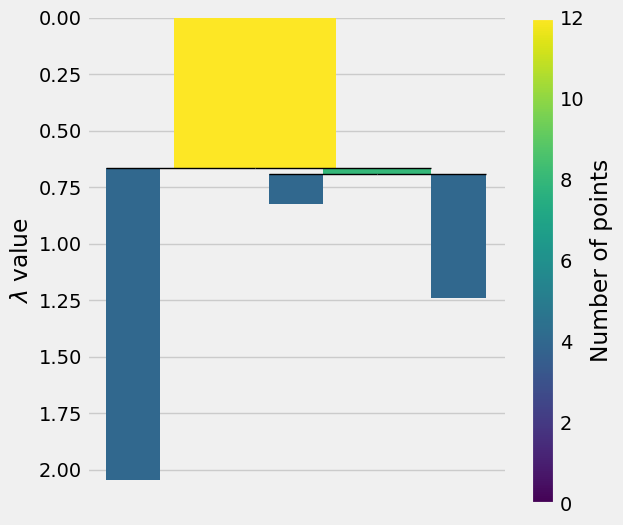

In [38]:
#condensing cluster hierarchy
plt.figure(figsize= [6,6])
hdb.condensed_tree_.plot()
plt.show()

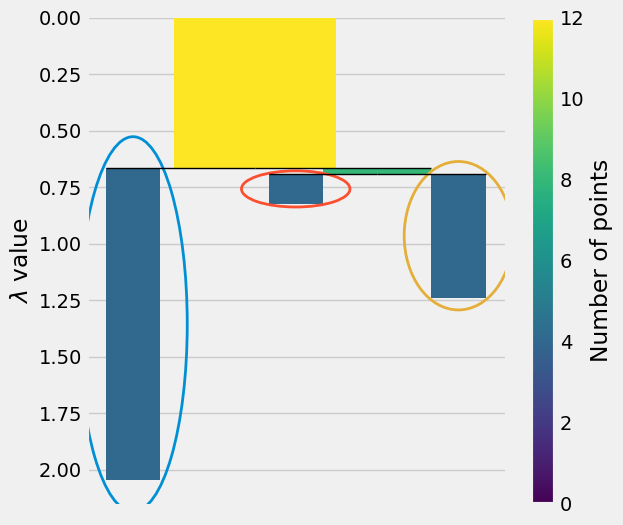

In [39]:
#extract principal clusters
import seaborn as sns
plt.figure(figsize= [6,6])
hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

## 4- Spectral clustering

**idea** : Project data in a space with higher dimension to increase the probability that data structure are linearly separable.

**Method** :

- Build the non oriented graph $G(X,W)$ - $W$ Gram similarity, $D$ its degree matrix (degree=sum in line, 0 otherwise)

- Compute a Laplacian matrix $L$ from $W$, ex:$L_{NJW}=D^{-.5}WD^{-.5}$

- Extract eigenvalues and eigenvectors of L

- Apply a basic clustering algorithm in the ($K$)-eigenvectors to extract the group number assigned to each point.


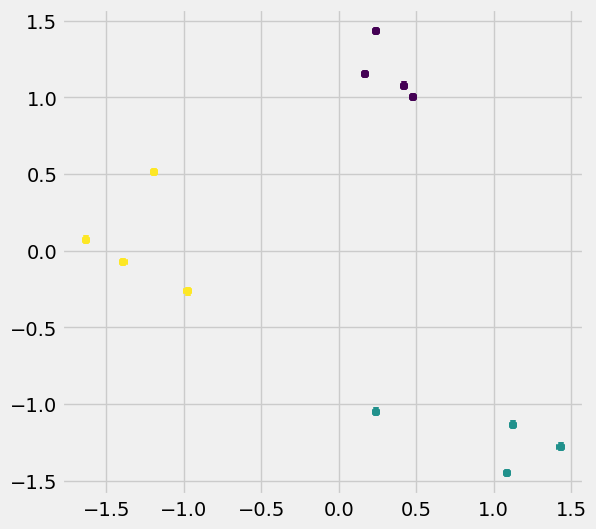

In [40]:
from sklearn.cluster import SpectralClustering
sclust = SpectralClustering(n_clusters=3, assign_labels="kmeans",random_state=0)
sclust.fit(X)

plt.figure(figsize= [6,6])
SClabels=sclust.labels_
plt.scatter(x,y,marker='+',c=SClabels)
plt.show()


In [41]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

ARI=adjusted_rand_score(SClabels,HClabels)
AMI=adjusted_mutual_info_score(SClabels,HClabels)

#ARI=adjusted_rand_score(SClabels,label)
#AMI=adjusted_mutual_info_score(SClabels,label)

print("ARI=",ARI)
print("AMI=",AMI)


ARI= 1.0
AMI= 1.0
